In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

# csvデータ読み込み
base_dic_name = './data/openface/csv/'

# issei  ESFJ -> S
# kai    ESFP -> S
# katuki ISFP -> S
filename_S = []
filename_S.extend((base_dic_name + 'issei/'+ fn) for fn in os.listdir(base_dic_name + 'issei'))
filename_S.extend((base_dic_name + 'kai/'+ fn) for fn in os.listdir(base_dic_name + 'kai'))
filename_S.extend((base_dic_name + 'katuki/'+ fn) for fn in os.listdir(base_dic_name + 'katuki'))
data_S = pd.concat(pd.read_csv(fn) for fn in filename_S)

# momoka ENFP -> N
# keito  ENFP -> N
filename_N = []
filename_N.extend((base_dic_name + 'momoka/'+ fn) for fn in os.listdir(base_dic_name + 'momoka'))
filename_N.extend((base_dic_name + 'keito/'+ fn) for fn in os.listdir(base_dic_name + 'keito'))
data_N = pd.concat(pd.read_csv(fn) for fn in filename_N)

# 顔を認識しなかった部分を削除
drop_index_S = data_S[data_S[' success'] == 0].index
drop_index_N = data_N[data_N[' success'] == 0].index
data_S.drop(drop_index_S, inplace=True)
data_N.drop(drop_index_N, inplace=True)


In [36]:
def display_boxplot(col_name):

  # 箱ひげ図
  fig, ax = plt.subplots()
  ax.boxplot((data_S[col_name], data_N[col_name])) # 複数指定する場合はタプル型
  ax.set_xticklabels(['S', 'N'])

  plt.title('openface' + col_name)
  plt.grid() # 横線ラインを入れることができます。

  # 描画
  plt.show()

  # f検定
  S_var = np.var(data_S[col_name], ddof=1)
  N_var = np.var(data_N[col_name], ddof=1)
  S_df = len(data_S[col_name])
  N_df = len(data_N[col_name])
  f = S_var / N_var
  one_sided_pval1 = stats.f.cdf(f, S_df, N_df)  # 片側検定のp値 1
  one_sided_pval2 = stats.f.sf(f, S_df, N_df)   # 片側検定のp値 2
  two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

  print('F:       ', round(f, 3))
  print('p-value: ', round(two_sided_pval, 3))

  # t検定(Welch)
  print(stats.ttest_ind(data_S[col_name], data_N[col_name], equal_var=False))

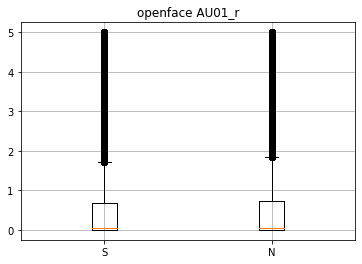

F:        0.782
p-value:  0.0
Ttest_indResult(statistic=-10.403208557498518, pvalue=2.4279620995476442e-25)


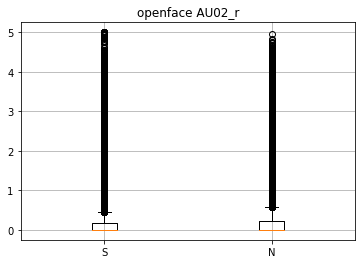

F:        0.834
p-value:  0.0
Ttest_indResult(statistic=-20.11227246040697, pvalue=6.905124028412835e-90)


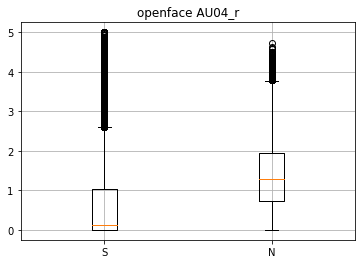

F:        0.988
p-value:  0.008
Ttest_indResult(statistic=-273.61082484951453, pvalue=0.0)


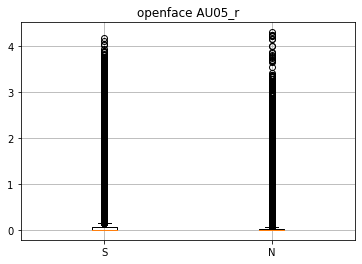

F:        3.687
p-value:  0.0
Ttest_indResult(statistic=64.42213973266374, pvalue=0.0)


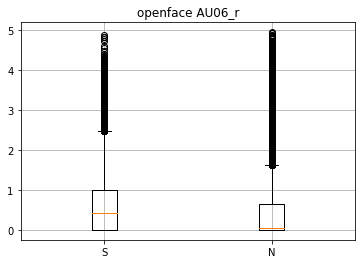

F:        0.914
p-value:  0.0
Ttest_indResult(statistic=81.22123166463362, pvalue=0.0)


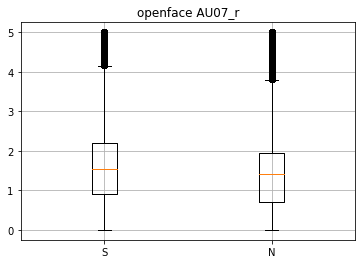

F:        1.303
p-value:  0.0
Ttest_indResult(statistic=69.23276300580856, pvalue=0.0)


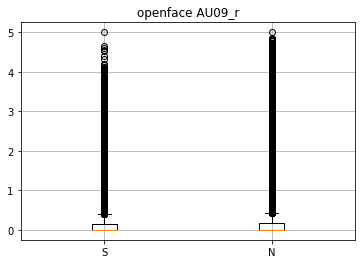

F:        0.288
p-value:  0.0
Ttest_indResult(statistic=-83.50022800756689, pvalue=0.0)


In [37]:
display_boxplot(' AU01_r')
display_boxplot(' AU02_r')
display_boxplot(' AU04_r')
display_boxplot(' AU05_r')
display_boxplot(' AU06_r')
display_boxplot(' AU07_r')
display_boxplot(' AU09_r')

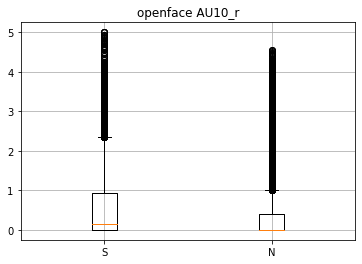

F:        1.248
p-value:  0.0
Ttest_indResult(statistic=89.50935768866934, pvalue=0.0)


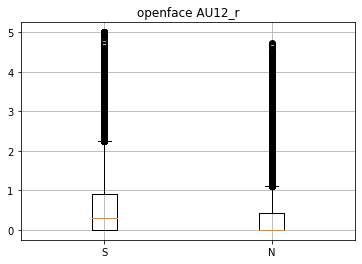

F:        1.27
p-value:  0.0
Ttest_indResult(statistic=103.19240139853068, pvalue=0.0)


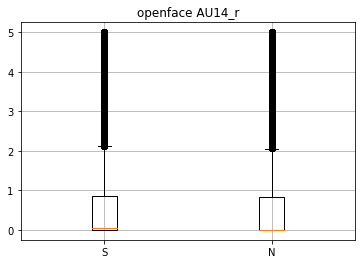

F:        1.053
p-value:  0.0
Ttest_indResult(statistic=16.160143469712125, pvalue=1.0476505039679346e-58)


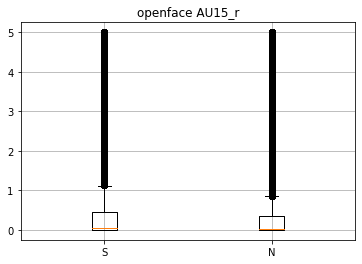

F:        2.321
p-value:  0.0
Ttest_indResult(statistic=51.97328848240284, pvalue=0.0)


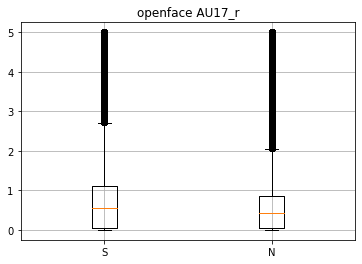

F:        1.282
p-value:  0.0
Ttest_indResult(statistic=55.97134135114246, pvalue=0.0)


In [38]:
display_boxplot(' AU10_r')
display_boxplot(' AU12_r')
display_boxplot(' AU14_r')
display_boxplot(' AU15_r')
display_boxplot(' AU17_r')

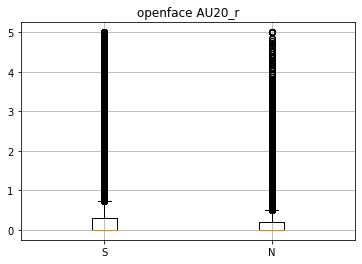

F:        2.134
p-value:  0.0
Ttest_indResult(statistic=46.73564702945679, pvalue=0.0)


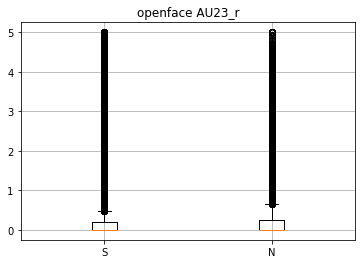

F:        1.39
p-value:  0.0
Ttest_indResult(statistic=6.2978633374295, pvalue=3.024538876646834e-10)


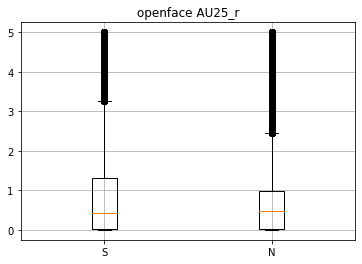

F:        2.321
p-value:  0.0
Ttest_indResult(statistic=71.10208406509045, pvalue=0.0)


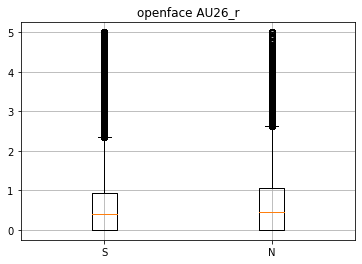

F:        1.316
p-value:  0.0
Ttest_indResult(statistic=-5.646777550410558, pvalue=1.6371838501823386e-08)


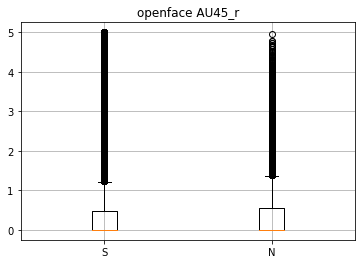

F:        2.418
p-value:  0.0
Ttest_indResult(statistic=27.706693982924417, pvalue=1.4798813310053536e-168)


In [39]:
display_boxplot(' AU20_r')
display_boxplot(' AU23_r')
display_boxplot(' AU25_r')
display_boxplot(' AU26_r')
display_boxplot(' AU45_r')